In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    """perceptron classifier
    
    Parameters
    ------------
    eta: float
        Learning rate between 0 and 1
    n_iter: int
        Passes over the training dataset
    
    Attributes
    ------------
    w_: 1d-array
        weights after fitting
    errors_:list
        Number of misclassification in every epoch
    """
    
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -------------
        X:{array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_featuers is the number of features.
        y: array-like, shape=[n_smaples]
            Target values.
        
        Returns
        ----------
        self: object
        """
        
        self.w_ = np.zeros(1 + X.shape[1]) #Add w_0
        self.errors_ = []
    
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)#analoge ? : in C++

In [3]:
import pandas as pd

In [4]:
from sklearn.datasets import  load_iris

In [5]:
df = load_iris()

In [6]:
X, y = df.data, df.target

In [7]:
X = X[:100,[0, 2]]

In [8]:
y = y[:100]

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

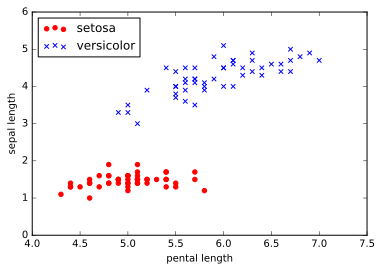

In [10]:
plt.scatter(X[:50, 0],X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('pental length')
plt.ylabel('sepal length')
plt.legend(loc = 'upper left')
plt.show()

In [11]:
pct = Perceptron(eta = 0.1, n_iter = 10)

In [12]:
pct.fit(X, y)

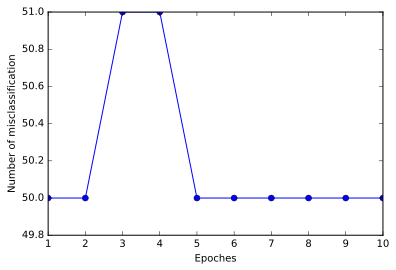

In [13]:
plt.plot(range(1, len(pct.errors_) + 1), pct.errors_, marker = 'o')
plt.xlabel('Epoches')
plt.ylabel('Number of misclassification')
plt.show()

In [14]:
from matplotlib.colors import  ListedColormap

In [15]:
def plot_decision_region(X, y, classifier, resolution = 0.02):
        #setop marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])
        
        #plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        #plot class samples
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], 
                       alpha = 0.8, c = cmap(idx),
                       marker = markers[idx], label = cl)

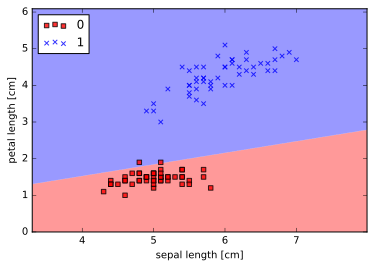

In [16]:
plot_decision_region(X, y, pct, 0.01)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()